In [1]:
import os
os.chdir(path='../..')
import scanpy as sc
import plotly.express as px
import matplotlib.pyplot as plt
import STForte.helper as stfhelper

sc.set_figure_params(dpi=120, transparent=True, dpi_save=400, frameon=False, vector_friendly=False, format="pdf")
trial_name = "trial-OSCC/sample_1"
plot_dir = f"./{trial_name}/plots"
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
sc.settings.figdir = plot_dir
plt.rcParams['font.sans-serif'] = [
    'Helvetica',
    'Arial',
    'sans-serif',]
palette = px.colors.qualitative.Plotly

/home/wcx99075523/miniconda3/envs/stforte/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Global seed set to 0


In [2]:
adata = sc.read_h5ad(f"./{trial_name}/outputs/stforte_1.h5ad")
adata_sp = sc.read_h5ad(f"./{trial_name}/outputs/sp_1.h5ad")
adata.obsm['spatial'] = adata.obs[['x','y']].values
adata, adata_sp

(AnnData object with n_obs × n_vars = 1131 × 15844
     obs: 'pathologist_anno.x', 'sample_id.x', 'cluster_annotations', 'in_tissue', 'row', 'col', 'x', 'y', 'STForte_Mask', 'louvain'
     uns: 'leiden', 'louvain_colors', 'neighbors', 'pathologist_anno.x_colors', 'spatial', 'umap'
     obsm: 'STForte_ATTR', 'STForte_COMB', 'STForte_TOPO', 'X_umap', 'spatial'
     layers: 'processed'
     obsp: 'connectivities', 'distances',
 AnnData object with n_obs × n_vars = 4097 × 300
     obs: 'spot_instance'
     obsm: 'SP_ATTR_FP', 'SP_COMB', 'SP_TOPO', 'spatial'
     obsp: 'A_STForte_conn', 'A_STForte_recon')

In [3]:
n_clusters = len(set(adata.obs['pathologist_anno.x']))
sc.pp.neighbors(adata, use_rep="STForte_ATTR")
sc.tl.umap(adata)

In [4]:
sc.tl.leiden(adata,resolution=0.2, key_added=f"leiden")

/home/wcx99075523/miniconda3/envs/stforte/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/wcx99075523/miniconda3/envs/stforte/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/wcx99075523/miniconda3/envs/stforte/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/wcx99075523/miniconda3/envs/stforte/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/wcx99075523/miniconda3/envs/stforte/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning

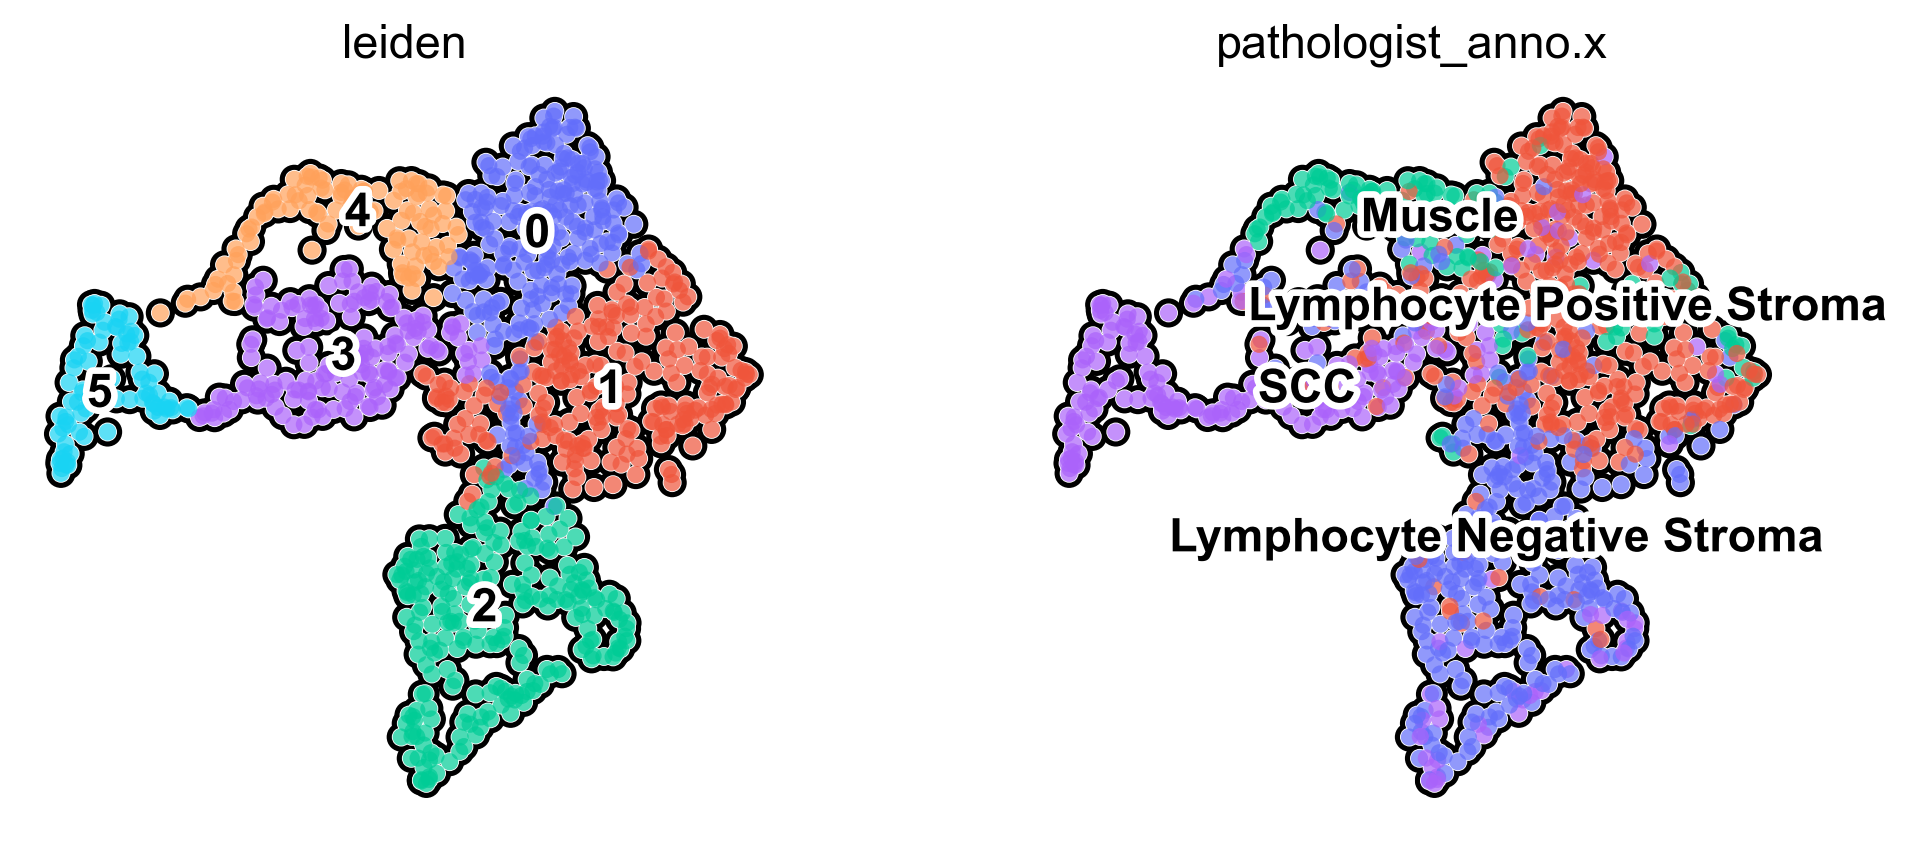

In [5]:
sc.pl.umap(adata, color=["leiden",'pathologist_anno.x'],
           legend_loc="on data", legend_fontoutline=4, add_outline=True, 
           palette=palette, frameon=False)

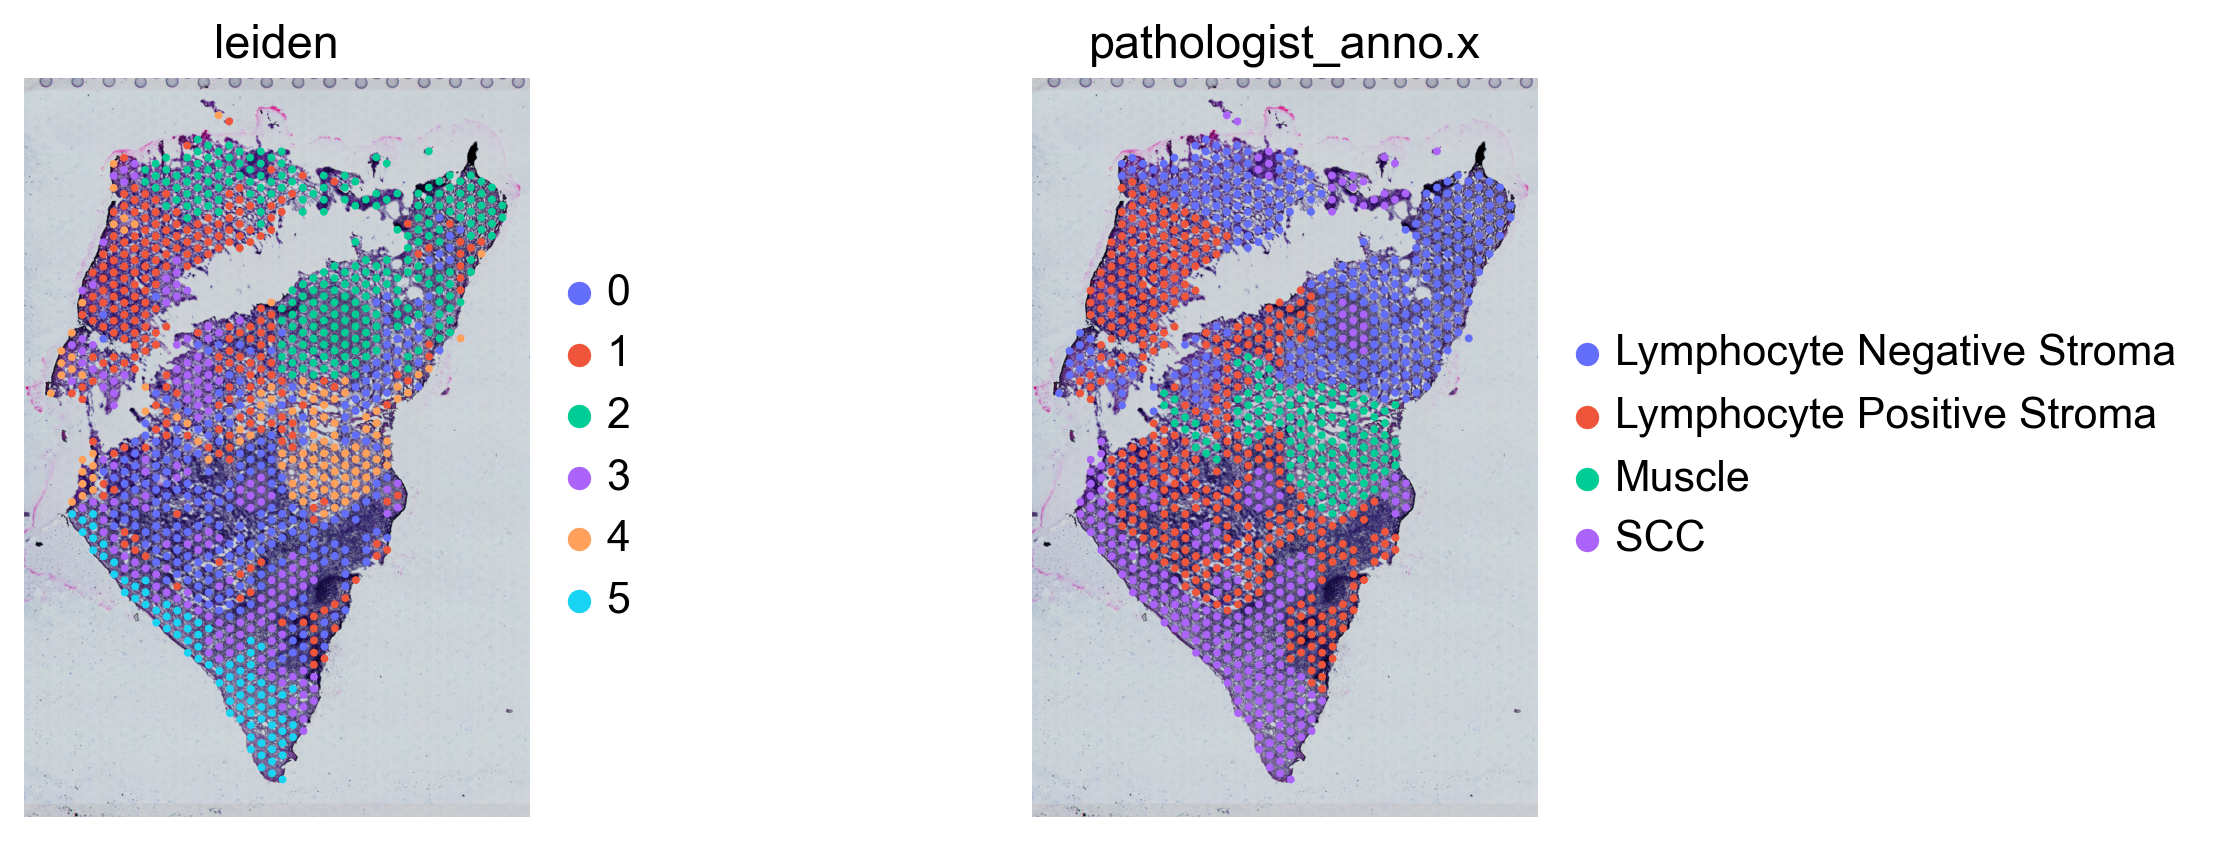

In [6]:
sc.pl.spatial(adata,color=["leiden","pathologist_anno.x"])

In [7]:
def manual_label(scc: list, normal: list, cluster: iter):
    lable = dict()
    for i in scc:
        lable[i] = "SCC"
    for i in normal:
        lable[i] = 'Normal'
    result = []
    for c in cluster:
        result.append(lable[c])
    return result

In [8]:
adata.obs['STForte_anno'] = manual_label(['3','5'],['0','1','2','4'],adata.obs['leiden'])
adata.obs['pathologist_anno'] = manual_label(['SCC'],['Lymphocyte Negative Stroma','Lymphocyte Positive Stroma','Muscle'],adata.obs['pathologist_anno.x'])

In [9]:
# STForte_pred = adata.obs['leiden'].to_numpy()
# STForte_pred[STForte_pred!='2'] = 'Normal tissue (STForte)'
# STForte_pred[STForte_pred=='3'] = 'SCC (STForte)'
# STForte_pred[STForte_pred=='5'] = 'SCC (STForte)'
# pathologist_anno = adata.obs['pathologist_anno.x'].to_numpy()
# pathologist_anno[pathologist_anno!='SCC'] = 'Normal tissue'
# adata.obs['STForte_anno'] = STForte_pred
# adata.obs['pathologist_anno'] = pathologist_anno
# adata.obs['STForte_anno'] = adata.obs['STForte_anno'].astype('category').cat.reorder_categories(['Normal tissue (STForte)','SCC (STForte)'])
# adata.obs['pathologist_anno'] = adata.obs['pathologist_anno'].astype('category').cat.reorder_categories(['Normal tissue','SCC'])

/home/wcx99075523/miniconda3/envs/stforte/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/wcx99075523/miniconda3/envs/stforte/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/wcx99075523/miniconda3/envs/stforte/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/wcx99075523/miniconda3/envs/stforte/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/wcx99075523/miniconda3/envs/stforte/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning

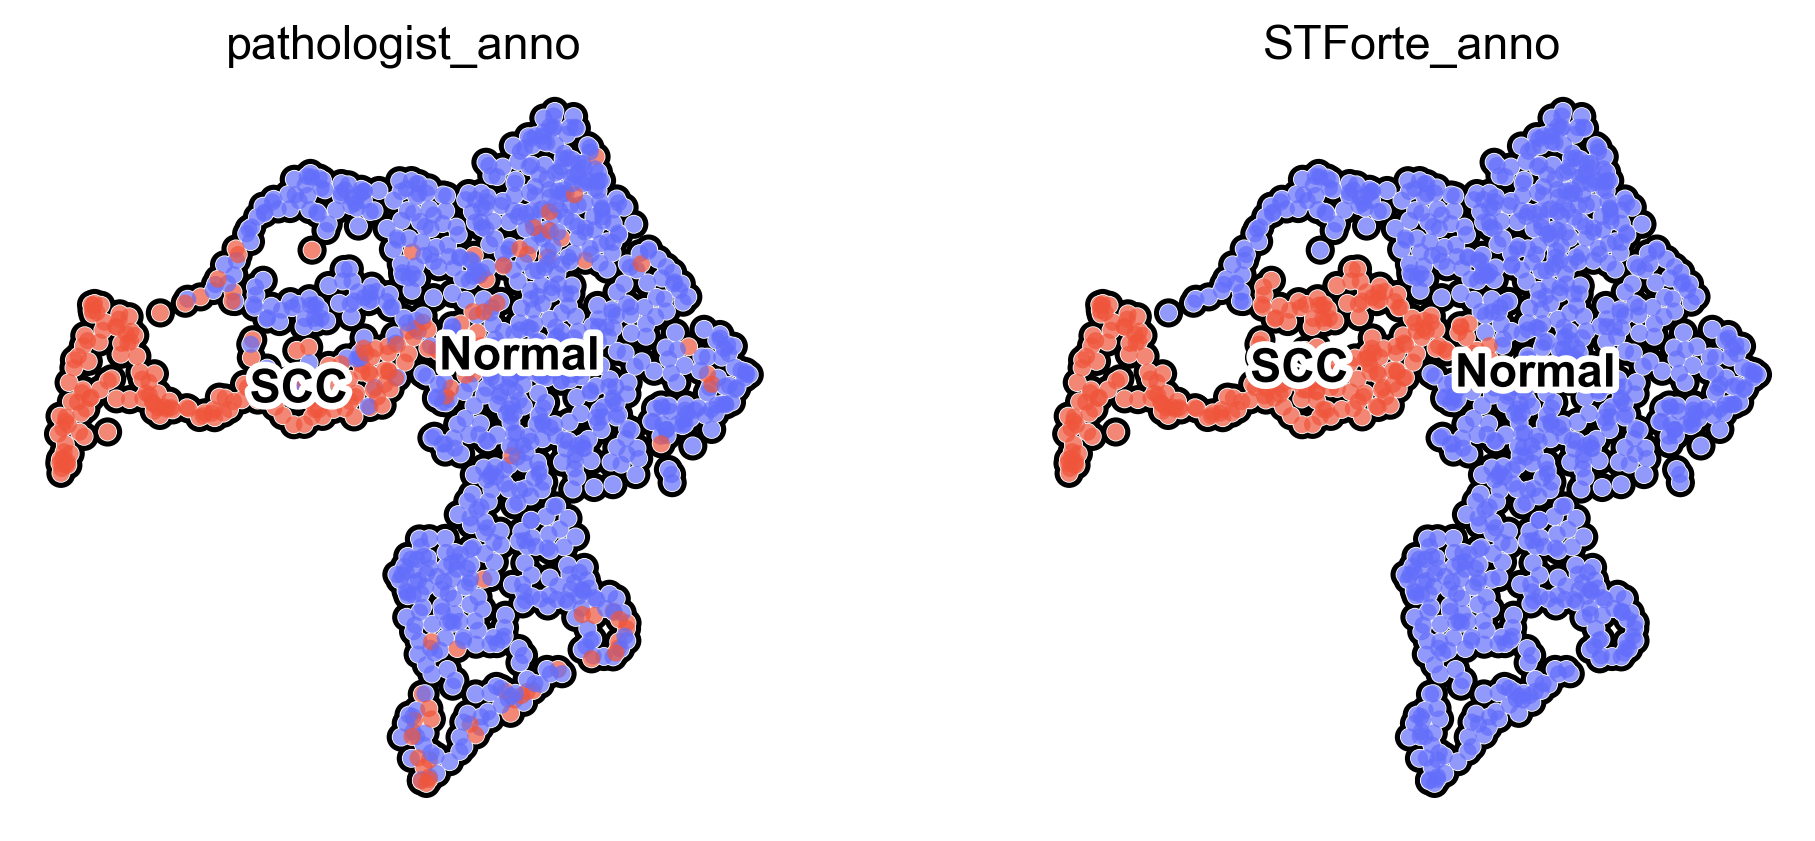

In [10]:
sc.pl.umap(adata, color=['pathologist_anno',"STForte_anno"],
           legend_loc="on data", legend_fontoutline=4, add_outline=True, 
           palette=palette, frameon=False)

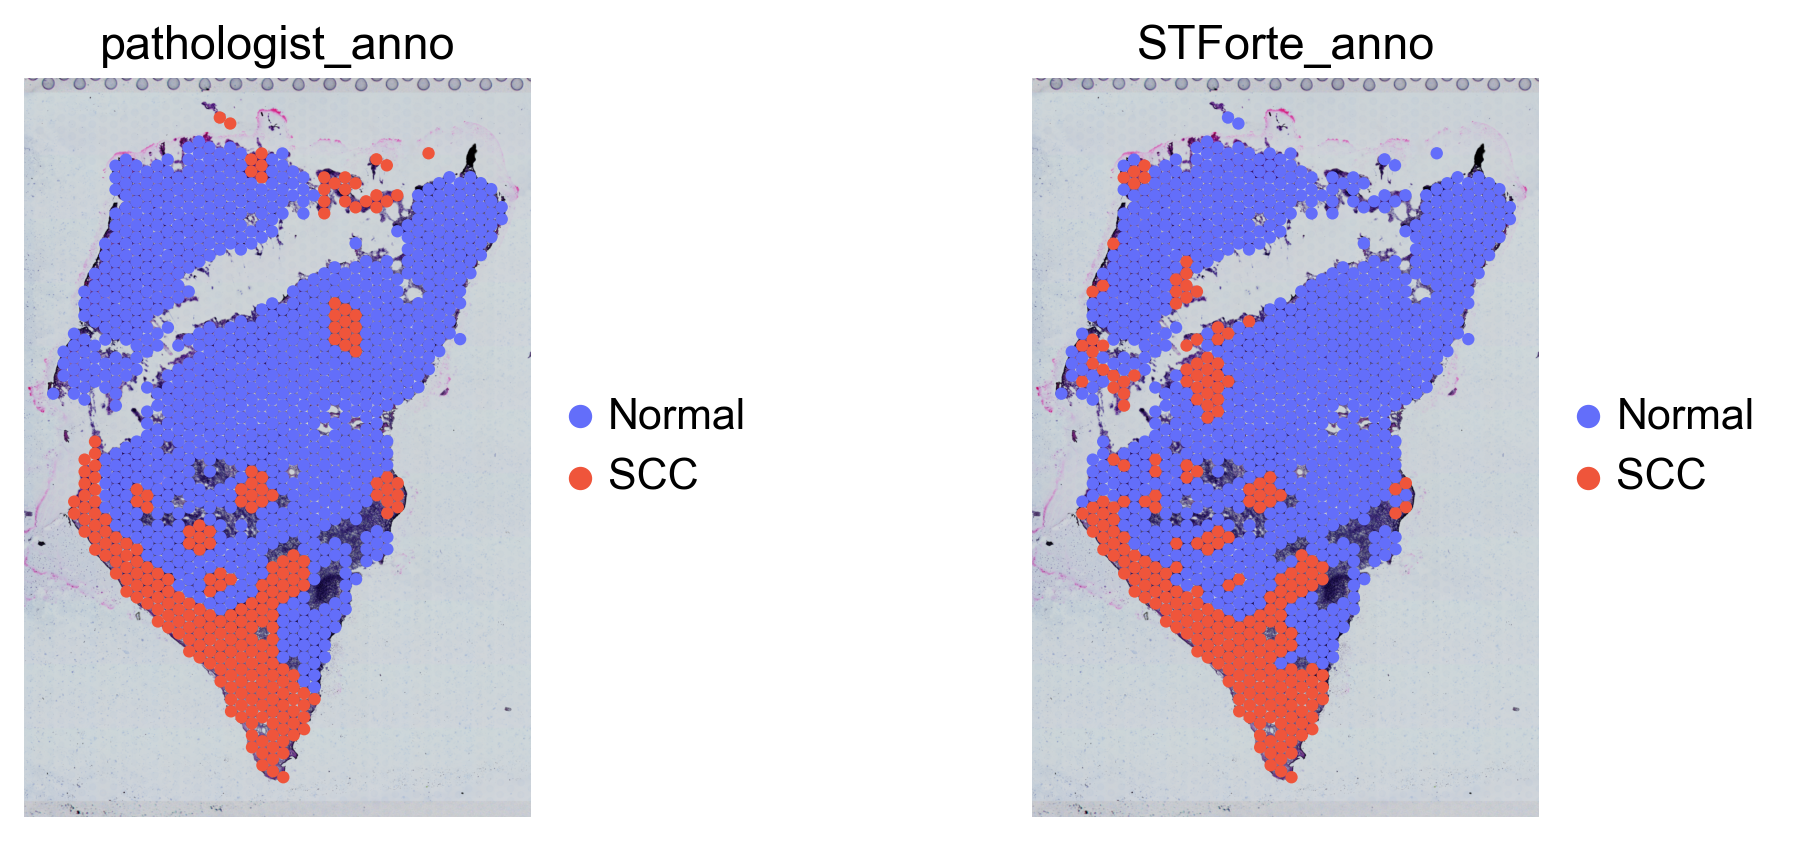

In [11]:
sc.pl.spatial(adata,color=['pathologist_anno',"STForte_anno"],s=13,palette=palette,save="STForte_clustering.pdf")
# sc.pl.spatial(adata,color=['pathologist_anno'],s=13,palette=palette)

In [12]:
# UMAP for padded data
sc.pp.neighbors(adata_sp, use_rep="SP_TOPO")
sc.tl.umap(adata_sp)
# Propagate annotations
stfhelper.annotation_propagate(adata_sp, "STForte_anno", adata, latent_embed="SP_TOPO")

/home/wcx99075523/miniconda3/envs/stforte/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/wcx99075523/miniconda3/envs/stforte/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/wcx99075523/miniconda3/envs/stforte/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


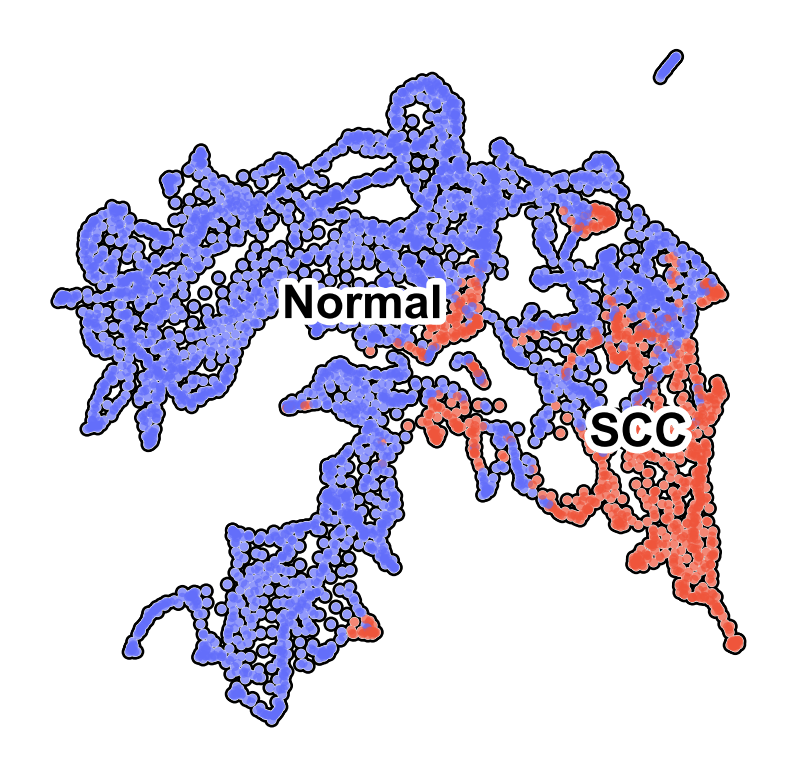

In [13]:
sc.pl.umap(adata_sp, color=["STForte_anno_with_padding"], title="", legend_loc="on data", legend_fontoutline=4, add_outline=True, 
               palette=palette, frameon=False,
               save="_sp_pad_by_comb",)

In [14]:
adata_sp.uns = adata.uns

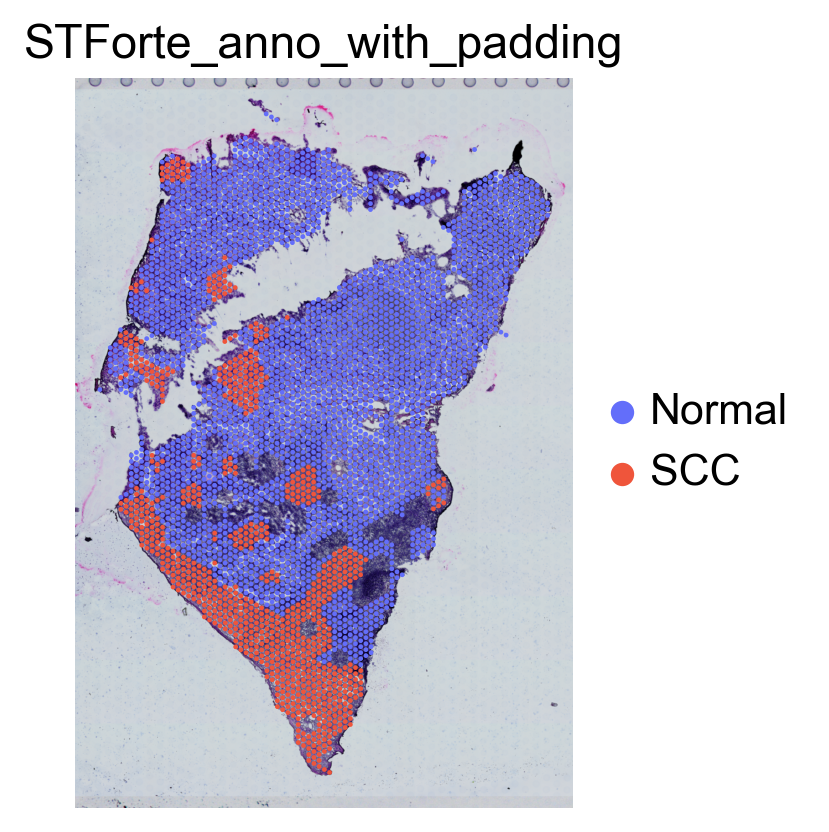

In [15]:
sc.pl.spatial(adata_sp,color=['STForte_anno_with_padding'],s=5,palette=palette,save="STForte_padding.pdf")

In [16]:
adata.write(f"./{trial_name}/outputs/stforte.h5ad")
adata_sp.write_h5ad("./{:s}/outputs/sp.h5ad".format(trial_name))